In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from time import time

from sklearn.manifold import TSNE
from PIL import Image
import cv2

In [4]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
module_path = os.path.abspath(os.path.join('..\\Spyder'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [5]:
def type_of_car(file_names):
    list_type_of_cars = []
    for file_name in file_names:
        str_type = ""
        for i in np.arange(len(file_name)):
            if(file_name[i]!='_'):
                str_type +=  file_name[i]
            else:
                break
        list_type_of_cars.append(str_type)
    return list_type_of_cars

In [6]:
np.random.seed(50)

In [7]:
PATH_TO_DATASET_IMAGES = ".\\dataset\\Images_of_cars\\501015_928083_bundle_archive\\"

In [8]:
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir(PATH_TO_DATASET_IMAGES) if isfile(join(PATH_TO_DATASET_IMAGES, f))]

In [9]:
onlyfiles

['Acura_ILX_2013_28_16_110_15_4_70_55_179_39_FWD_5_4_4dr_aWg.jpg',
 'Acura_ILX_2013_28_16_110_15_4_70_55_179_39_FWD_5_4_4dr_Bbw.jpg',
 'Acura_ILX_2013_28_16_110_15_4_70_55_179_39_FWD_5_4_4dr_Cvl.jpg',
 'Acura_ILX_2013_28_16_110_15_4_70_55_179_39_FWD_5_4_4dr_eeu.jpg',
 'Acura_ILX_2013_28_16_110_15_4_70_55_179_39_FWD_5_4_4dr_gQW.jpg',
 'Acura_ILX_2013_28_16_110_15_4_70_55_179_39_FWD_5_4_4dr_Gzs.jpg',
 'Acura_ILX_2013_28_16_110_15_4_70_55_179_39_FWD_5_4_4dr_kMx.jpg',
 'Acura_ILX_2013_28_16_110_15_4_70_55_179_39_FWD_5_4_4dr_Mro.jpg',
 'Acura_ILX_2013_28_16_110_15_4_70_55_179_39_FWD_5_4_4dr_Ofi.jpg',
 'Acura_ILX_2013_28_16_110_15_4_70_55_179_39_FWD_5_4_4dr_onJ.jpg',
 'Acura_ILX_2013_28_16_110_15_4_70_55_179_39_FWD_5_4_4dr_plr.jpg',
 'Acura_ILX_2013_28_16_110_15_4_70_55_179_39_FWD_5_4_4dr_RuR.jpg',
 'Acura_ILX_2013_28_16_110_15_4_70_55_179_39_FWD_5_4_4dr_SLr.jpg',
 'Acura_ILX_2013_28_16_110_15_4_70_55_179_39_FWD_5_4_4dr_UMh.jpg',
 'Acura_ILX_2013_28_16_110_15_4_70_55_179_39_FWD_5_4_4dr_Wxn.j

In [10]:
list_type_of_cars = type_of_car(onlyfiles)

In [11]:
np.unique(list_type_of_cars)

array(['Acura', 'Alfa Romeo', 'Aston Martin', 'Audi', 'BMW', 'Bentley',
       'Buick', 'Cadillac', 'Chevrolet', 'Chrysler', 'Dodge', 'FIAT',
       'Ferrari', 'Ford', 'GMC', 'Genesis', 'Honda', 'Hyundai',
       'INFINITI', 'Jaguar', 'Jeep', 'Kia', 'Lamborghini', 'Land Rover',
       'Lexus', 'Lincoln', 'MINI', 'Maserati', 'Mazda', 'McLaren',
       'Mercedes-Benz', 'Mitsubishi', 'Nissan', 'Porsche', 'Ram',
       'Rolls-Royce', 'Subaru', 'Tesla', 'Toyota', 'Volkswagen', 'Volvo',
       'smart'], dtype='<U13')

In [12]:
list_type_of_cars = pd.DataFrame(list_type_of_cars, columns= ['type_of_car'])

In [13]:
list_type_of_cars.head()

,type_of_car
0,Acura
1,Acura
2,Acura
3,Acura
4,Acura


In [14]:
list_type_of_cars.type_of_car.value_counts()

Chevrolet        5079
Toyota           4598
Ford             4416
BMW              4121
Nissan           3881
Audi             3131
Mercedes-Benz    3097
Honda            2675
Kia              2160
Lexus            2125
Hyundai          2091
GMC              2067
Volkswagen       1752
Subaru           1605
Mazda            1475
Dodge            1345
Porsche          1344
Lincoln          1324
Cadillac         1311
Volvo            1231
Jeep             1196
Acura            1174
Jaguar           1062
MINI             1059
Buick             964
Land Rover        960
INFINITI          917
FIAT              892
Ram               747
Bentley           697
Mitsubishi        644
Aston Martin      574
Chrysler          570
Maserati          449
smart             386
Alfa Romeo        290
Rolls-Royce       277
Lamborghini       251
Tesla             191
Genesis           176
Ferrari            91
McLaren            72
Name: type_of_car, dtype: int64

In [15]:
list_type_of_cars_sample_idx = list_type_of_cars.sample(20000).index
list_type_of_cars_sample = list_type_of_cars.iloc[list_type_of_cars_sample_idx,:]
list_type_of_cars_sample = list_type_of_cars_sample.reset_index().drop(columns = 'index')
onlyfiles_sample = pd.DataFrame(onlyfiles, columns = ['file_name'])
onlyfiles_sample = onlyfiles_sample.iloc[list_type_of_cars_sample_idx,:]
onlyfiles_sample = onlyfiles_sample.reset_index().drop(columns = 'index')

In [16]:
list_type_of_cars_sample.type_of_car.value_counts()

Chevrolet        1584
Toyota           1435
Ford             1376
BMW              1281
Nissan           1239
Audi              943
Mercedes-Benz     926
Honda             870
Hyundai           666
Kia               648
GMC               643
Lexus             630
Volkswagen        544
Subaru            481
Mazda             480
Dodge             443
Cadillac          424
Volvo             407
Lincoln           407
Porsche           402
Jeep              370
Acura             357
Jaguar            330
Land Rover        318
MINI              309
INFINITI          292
Buick             290
FIAT              275
Bentley           217
Ram               211
Chrysler          192
Mitsubishi        190
Aston Martin      179
Maserati          140
smart             107
Rolls-Royce        81
Alfa Romeo         74
Lamborghini        73
Genesis            62
Tesla              54
Ferrari            32
McLaren            18
Name: type_of_car, dtype: int64

In [17]:
image_sample =  np.array(cv2.imread(PATH_TO_DATASET_IMAGES + str(onlyfiles_sample.iloc[0,0])))
image_sample = cv2.cvtColor(image_sample, cv2.COLOR_BGR2GRAY)

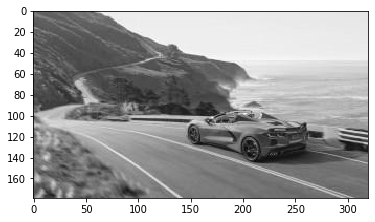

In [18]:
plt.imshow(image_sample, cmap='gray', vmin=0, vmax=255)
plt.show()

In [19]:
image_sample.shape

(179, 320)

In [20]:
onlyfiles_sample.shape

(20000, 1)

In [21]:
height = 240
width = 320
X = np.zeros((onlyfiles_sample.shape[0], height*width))


Load images

In [22]:
counter = 0
for i, file_image in enumerate(onlyfiles_sample.values): 
        try:            
            image = np.array(cv2.imread(PATH_TO_DATASET_IMAGES + str(file_image[0]))) 
            image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            if (image.shape[0] != height) or (image.shape[1] != width):
                counter +=1 
                image = cv2.resize(image, (width, height))
            X[i,:] = image.ravel()
        except:
            print('Error reading image')
            continue 
    

Take 64 random sample images

In [28]:
images_random_sample = pd.DataFrame(np.arange(len(list_of_images)))

In [29]:
random_sample_idxs = images_random_sample.reset_index().sample(64).index

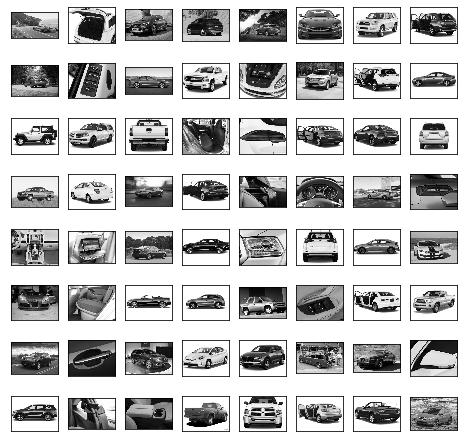

In [33]:
# initial visualization
fig = plt.figure(figsize= (8,8))
counter = 0
for i in (random_sample_idxs):
    plt.subplot(8,8,counter+1)
    counter+=1
    plt.imshow(list_of_images[i], cmap = plt.cm.gray, interpolation='nearest')
    #plt.text(x= 0.08, y = 3.5, s = y_sample.iloc[i, 0])
    
    plt.xticks([]),  plt.yticks([])

In [24]:
X.shape

(20000, 76800)

Reduce input data to 30 dimension by using PCA

In [ ]:
from sklearn.decomposition import PCA
random_state = 0
pca = PCA(n_components=400, random_state = random_state)
X_pca = pca.fit_transform(X)


Fit t-SNE

In [21]:
t_SNE = TSNE(n_components = 2, perplexity = 60, method = "barnes_hut", early_exaggeration=12.0, random_state = 1, verbose = 1)

In [22]:
X_trans = t_SNE.fit_transform(X_pca)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 33142 samples in 0.246s...
[t-SNE] Computed neighbors for 33142 samples in 14.676s...
[t-SNE] Computed conditional probabilities for sample 1000 / 33142
[t-SNE] Computed conditional probabilities for sample 2000 / 33142
[t-SNE] Computed conditional probabilities for sample 3000 / 33142
[t-SNE] Computed conditional probabilities for sample 4000 / 33142
[t-SNE] Computed conditional probabilities for sample 5000 / 33142
[t-SNE] Computed conditional probabilities for sample 6000 / 33142
[t-SNE] Computed conditional probabilities for sample 7000 / 33142
[t-SNE] Computed conditional probabilities for sample 8000 / 33142
[t-SNE] Computed conditional probabilities for sample 9000 / 33142
[t-SNE] Computed conditional probabilities for sample 10000 / 33142
[t-SNE] Computed conditional probabilities for sample 11000 / 33142
[t-SNE] Computed conditional probabilities for sample 12000 / 33142
[t-SNE] Computed conditional probabilities for s

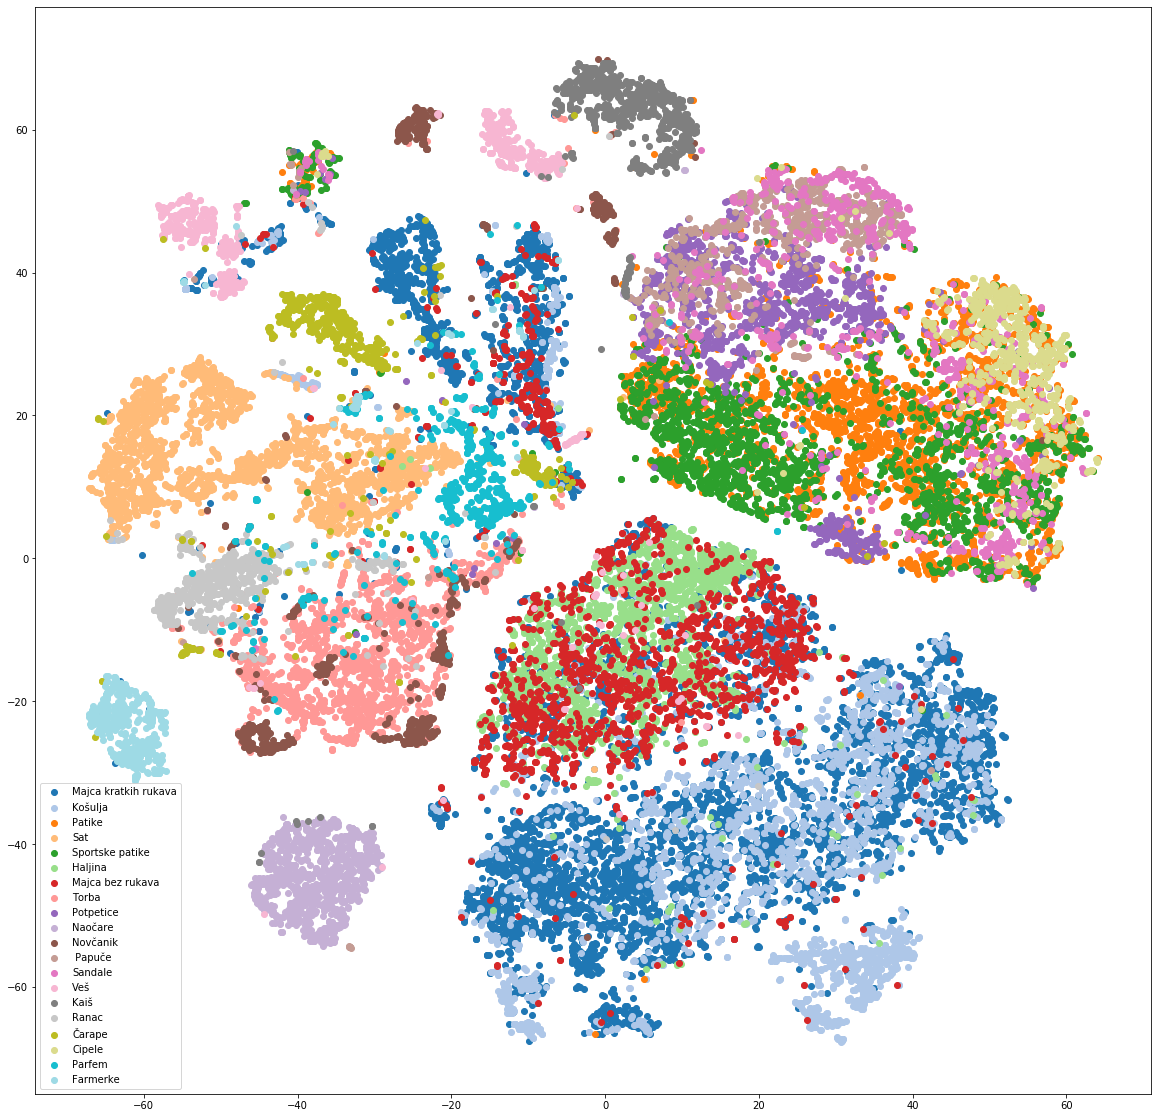

In [25]:
number = len(reduced_articleType_list)
cmap = plt.get_cmap('tab20')
colors = [cmap(i) for i in np.linspace(0, 1, number)]
plt.figure(figsize = (20,20))
for i, articleType in enumerate(map_for_reduced_articleType_list):
    plt.scatter(X_trans[reduces_styles.articleType == articleType,0], X_trans[reduces_styles.articleType == articleType,1], color = colors[i])
plt.legend(map_for_reduced_articleType_list)
plt.show()